# World Happiness Score Prediction Using Linear Regression and Random Forest Regressor

- Project Title : World Happiness Score Prediction Using Machine Learning
- Group Number : 65
- Group Members:
    - EG/2021/4599 - Karunarathna J. S.
    - EG/2021/4604 - Karunathilake A. D. H.

# Introduction

The World Happiness Report is an annual publication that measures the well-being and happiness of people across different countries. This dataset is derived from a global survey conducted by Gallup, where individuals are asked to evaluate their quality of life on a scale known as the "Cantril Ladder." The scores range from 0 (the worst possible life) to 10 (the best possible life). The report also examines how various factors such as economic production, social support, life expectancy, freedom, generosity, and absence of corruption contribute to happiness across nations.

In this project, the goal is to build a machine learning model that predicts the happiness score for each country based on these contributing factors. Understanding the correlation between these factors and the happiness score can help policymakers and organizations devise strategies to improve the well-being of their citizens. By predicting happiness scores accurately, we aim to uncover deeper insights into the elements that drive happiness and assess their relative importance in global well-being.

# Literature Survey
The concept of measuring happiness on a global scale has gained significant attention from policymakers and researchers over the past decade. The **World Happiness Report**, first published in 2012, has become a major reference for understanding well-being trends globally. The report uses data from Gallup’s World Poll to assess life satisfaction and factors influencing happiness. Each year, economists and psychologists examine these reports to offer guidance on improving well-being through data-driven insights.

Several studies have explored the relationship between economic and social factors and happiness. For example, *Easterlin (1974)* introduced the **Easterlin Paradox**, which shows that while richer nations tend to report higher happiness scores, there is no clear link between income growth and long-term increases in happiness. More recently, research has turned towards evaluating non-economic factors such as **social support, mental health, and community engagement** as stronger indicators of well-being (*Layard, 2005*).

Machine learning techniques have also been applied to predict happiness scores, often using models like **linear regression**, **decision trees**, and **random forests**. These models attempt to correlate measurable national indicators, such as GDP per capita or life expectancy, with the reported happiness scores. Studies indicate that while economic factors like GDP per capita have a notable impact, factors like **freedom** and **corruption** play equally crucial roles in explaining variations in happiness across countries (*Helliwell et al., 2020*).

In this project, by leveraging the World Happiness dataset, we seek to build a machine learning model that captures the relationships between these contributing factors and predicts happiness scores for countries globally. This model can further highlight which variables are most influential in driving national happiness, offering valuable insights for global well-being policies.

# Dataset Description
Link to dataset: https://www.kaggle.com/datasets/unsdsn/world-happiness/data

The dataset used in this project is sourced from the **World Happiness Report** and includes data for the years 2015 to 2019, covering over 150 countries. It is composed of multiple columns that represent both the happiness score and the contributing factors to each country's score. The primary columns are:

- **Country**: The name of the country.
- **Happiness Score**: A score between 0 and 10, representing the average Cantril Ladder score based on survey responses.
- **GDP per Capita**: The contribution of a country's economic output to its happiness.
- **Social Support (Family)**: The extent of social support and familial relationships.
- **Life Expectancy**: The health and longevity of the population.
- **Freedom**: The freedom individuals feel in making life choices.
- **Generosity**: The perceived generosity in the country.
- **Trust (Government Corruption)**: The level of trust in the government and perceptions of corruption.
- **Dystopia Residual**: A metric combining a hypothetical "Dystopia" score and residual errors from the model. It helps to establish a lower-bound reference for the happiness score.

### Dataset Fields:
| Column Name           | Description                                                                 |
|-----------------------|-----------------------------------------------------------------------------|
| **Country**            | Name of the country                                                         |
| **Happiness Score**    | The Cantril ladder score for the country (0 to 10)                           |
| **GDP per Capita**     | The economic contribution to happiness                                      |
| **Family**             | Represents social support within the country                                |
| **Life Expectancy**    | Health metric based on average life expectancy                              |
| **Freedom**            | The perceived freedom to make life choices                                  |
| **Generosity**         | The country's generosity as measured by charitable giving                   |
| **Trust (Government Corruption)** | Perceptions of corruption in the government                      |
| **Dystopia Residual**  | The unexplained component of the happiness score, using Dystopia as a base   |

The happiness score is calculated as the sum of these contributing factors, and it represents a holistic assessment of a nation’s happiness. Each factor quantifies the impact of different social, economic, and health-related aspects on the overall happiness of a country’s citizens.

This dataset provides an excellent opportunity to explore the relationships between these factors using machine learning models to predict happiness scores. Understanding the relative contribution of each factor to happiness can offer valuable insights into global well-being trends.

# Data Preprocessing before EDA

### Import Libraries
For visualization and statistics we first import necessary libraries

In [14]:
# For visualization and statistics we first import necessary libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


### Import Dataframes and Inspect the features
Next we import datasets from all 5 years into pandas dataframes separately.

In [15]:
# Load datasets from 2015 to 2019
df_2015 = pd.read_csv("2015.csv")
df_2016 = pd.read_csv("2016.csv")
df_2017 = pd.read_csv("2017.csv")
df_2018 = pd.read_csv("2018.csv")
df_2019 = pd.read_csv("2019.csv")

# Print columns of each dataframe to inspect the features
print("2015 Dataset Columns: ", df_2015.columns)
print("2016 Dataset Columns: ", df_2016.columns)
print("2017 Dataset Columns: ", df_2017.columns)
print("2018 Dataset Columns: ", df_2018.columns)
print("2019 Dataset Columns: ", df_2019.columns)


2015 Dataset Columns:  Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')
2016 Dataset Columns:  Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Lower Confidence Interval', 'Upper Confidence Interval',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual'],
      dtype='object')
2017 Dataset Columns:  Index(['Country', 'Happiness.Rank', 'Happiness.Score', 'Whisker.high',
       'Whisker.low', 'Economy..GDP.per.Capita.', 'Family',
       'Health..Life.Expectancy.', 'Freedom', 'Generosity',
       'Trust..Government.Corruption.', 'Dystopia.Residual'],
      dtype='object')
2018 Dataset Columns:  Index(['Overall rank', 'Country or region'

We can see that for some years, there are many features and for some years it's not. And also for same thing different years have different column titles as well. Therefore, before proceeding further we need to standardize column names and remove unnecessary features as well. 

In [16]:
# Rename column names for standardize
df_2015.rename(columns={
    'Happiness Score': 'Score',
    'Economy (GDP per Capita)': 'Economy',
    'Family': 'Social support',
    'Health (Life Expectancy)': 'Life expectancy',
    'Trust (Government Corruption)': 'Perceptions of corruption',
}, inplace=True)

df_2016.rename(columns={
    'Happiness Score': 'Score',
    'Economy (GDP per Capita)': 'Economy',
    'Family': 'Social support',
    'Health (Life Expectancy)': 'Life expectancy',
    'Trust (Government Corruption)': 'Perceptions of corruption',
}, inplace=True)

df_2017.rename(columns={
    'Happiness.Score': 'Score',
    'Economy..GDP.per.Capita.': 'Economy',
    'Family': 'Social support',
    'Health..Life.Expectancy.': 'Life expectancy',
    'Trust..Government.Corruption.': 'Perceptions of corruption',
    'Dystopia.Residual': 'Dystopia Residual',
}, inplace=True)

df_2018.rename(columns={
    'Country or region': 'Country',
    'GDP per capita': 'Economy',
    'Healthy life expectancy': 'Life expectancy',
    'Freedom to make life choices': 'Freedom'
}, inplace=True)

df_2019.rename(columns={
    'Country or region': 'Country',
    'GDP per capita': 'Economy',
    'Healthy life expectancy': 'Life expectancy',
    'Freedom to make life choices': 'Freedom'
}, inplace=True)

# Print out the column names again to confirm consistency
print("2015 Dataset Columns: ", df_2015.columns)
print("2016 Dataset Columns: ", df_2016.columns)
print("2017 Dataset Columns: ", df_2017.columns)
print("2018 Dataset Columns: ", df_2018.columns)
print("2019 Dataset Columns: ", df_2019.columns)

2015 Dataset Columns:  Index(['Country', 'Region', 'Happiness Rank', 'Score', 'Standard Error',
       'Economy', 'Social support', 'Life expectancy', 'Freedom',
       'Perceptions of corruption', 'Generosity', 'Dystopia Residual'],
      dtype='object')
2016 Dataset Columns:  Index(['Country', 'Region', 'Happiness Rank', 'Score',
       'Lower Confidence Interval', 'Upper Confidence Interval', 'Economy',
       'Social support', 'Life expectancy', 'Freedom',
       'Perceptions of corruption', 'Generosity', 'Dystopia Residual'],
      dtype='object')
2017 Dataset Columns:  Index(['Country', 'Happiness.Rank', 'Score', 'Whisker.high', 'Whisker.low',
       'Economy', 'Social support', 'Life expectancy', 'Freedom', 'Generosity',
       'Perceptions of corruption', 'Dystopia Residual'],
      dtype='object')
2018 Dataset Columns:  Index(['Overall rank', 'Country', 'Score', 'Economy', 'Social support',
       'Life expectancy', 'Freedom', 'Generosity',
       'Perceptions of corruption'],

Now we have consistent column names for all five years of data sets. But we need to remove the unnecessary columns like Standard Error in 2015 data set, Region, Whisker.low Whisker.high etc.

In [17]:
# Drop unnecessary columns from 2015 dataset
df_2015.drop(columns=['Happiness Rank','Region', 'Standard Error', 'Dystopia Residual'], inplace=True)

# Drop unnecessary columns from 2016 dataset
df_2016.drop(columns=['Happiness Rank','Region','Lower Confidence Interval', 'Upper Confidence Interval', 'Dystopia Residual'], inplace=True)

# Drop unnecessary columns from 2017 dataset
df_2017.drop(columns=['Happiness.Rank','Whisker.high', 'Whisker.low', 'Dystopia Residual'], inplace=True)

# Drop unwanted columns in 2018 and 2019
df_2018.drop(columns=['Overall rank'], inplace=True)
df_2019.drop(columns=['Overall rank'], inplace=True)

In [18]:
# Print out the column names again to confirm consistency
print("2015 Dataset Columns: ", df_2015.columns)
print("2016 Dataset Columns: ", df_2016.columns)
print("2017 Dataset Columns: ", df_2017.columns)
print("2018 Dataset Columns: ", df_2018.columns)
print("2019 Dataset Columns: ", df_2019.columns)

2015 Dataset Columns:  Index(['Country', 'Score', 'Economy', 'Social support', 'Life expectancy',
       'Freedom', 'Perceptions of corruption', 'Generosity'],
      dtype='object')
2016 Dataset Columns:  Index(['Country', 'Score', 'Economy', 'Social support', 'Life expectancy',
       'Freedom', 'Perceptions of corruption', 'Generosity'],
      dtype='object')
2017 Dataset Columns:  Index(['Country', 'Score', 'Economy', 'Social support', 'Life expectancy',
       'Freedom', 'Generosity', 'Perceptions of corruption'],
      dtype='object')
2018 Dataset Columns:  Index(['Country', 'Score', 'Economy', 'Social support', 'Life expectancy',
       'Freedom', 'Generosity', 'Perceptions of corruption'],
      dtype='object')
2019 Dataset Columns:  Index(['Country', 'Score', 'Economy', 'Social support', 'Life expectancy',
       'Freedom', 'Generosity', 'Perceptions of corruption'],
      dtype='object')


In the 5 years of data sets we only have limited number of records for one year. As a example for 2015, we have only 158 records. for 2016 we have only 157 records and for 2017, 2018 and 2019, we have 155, 156 and 156 records. It's hard to train a model for such a small data set because the model may not be able to capture the relations of the data. because of that we decided to merge all 5 years of data into one dataframe. 

In [19]:
# Merge all datasets
df_combined = pd.concat([df_2015, df_2016, df_2017, df_2018, df_2019])

# Reset index after merging
df_combined.reset_index(drop=True, inplace=True)

# Check the shape and first few rows of the combined dataset
print("Combined Dataset Shape:", df_combined.shape)
print(df_combined.head())

Combined Dataset Shape: (782, 8)
       Country  Score  Economy  Social support  Life expectancy  Freedom  \
0  Switzerland  7.587  1.39651         1.34951          0.94143  0.66557   
1      Iceland  7.561  1.30232         1.40223          0.94784  0.62877   
2      Denmark  7.527  1.32548         1.36058          0.87464  0.64938   
3       Norway  7.522  1.45900         1.33095          0.88521  0.66973   
4       Canada  7.427  1.32629         1.32261          0.90563  0.63297   

   Perceptions of corruption  Generosity  
0                    0.41978     0.29678  
1                    0.14145     0.43630  
2                    0.48357     0.34139  
3                    0.36503     0.34699  
4                    0.32957     0.45811  


So now we have 782 data points with 7 features and target.

# Exploratory Data Analysis

To avoid data snooping, it's better to split the data set first

In [20]:
from sklearn.model_selection import train_test_split

# Splitting the dataset into features and target
X = df_combined.drop(columns=['Score'])  # Adjust target column name if necessary
y = df_combined['Score']

# Splitting into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Checking the shapes of the splits
print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}")


Train shape: (625, 7), Test shape: (157, 7)


1. Summery Statistics

In [21]:
# Summary statistics
print("Dataset Summary:\n")
print(df_combined.describe())

Dataset Summary:

            Score     Economy  Social support  Life expectancy     Freedom  \
count  782.000000  782.000000      782.000000       782.000000  782.000000   
mean     5.379018    0.916047        1.078392         0.612416    0.411091   
std      1.127456    0.407340        0.329548         0.248309    0.152880   
min      2.693000    0.000000        0.000000         0.000000    0.000000   
25%      4.509750    0.606500        0.869363         0.440183    0.309768   
50%      5.322000    0.982205        1.124735         0.647310    0.431000   
75%      6.189500    1.236187        1.327250         0.808000    0.531000   
max      7.769000    2.096000        1.644000         1.141000    0.724000   

       Perceptions of corruption  Generosity  
count                 781.000000  782.000000  
mean                    0.125436    0.218576  
std                     0.105816    0.122321  
min                     0.000000    0.000000  
25%                     0.054000    0.130000

- By summery statistics we can see that Perceptions of corruption is missing a value. Let's recheck whether dataset have a null value.

In [22]:
# Check for null values
print("Missing Values:\n")
print(df_combined.isnull().sum())

Missing Values:

Country                      0
Score                        0
Economy                      0
Social support               0
Life expectancy              0
Freedom                      0
Perceptions of corruption    1
Generosity                   0
dtype: int64


- Perceptions of corruption definitely have a null value. So we will treat it in the data preprocessing section.

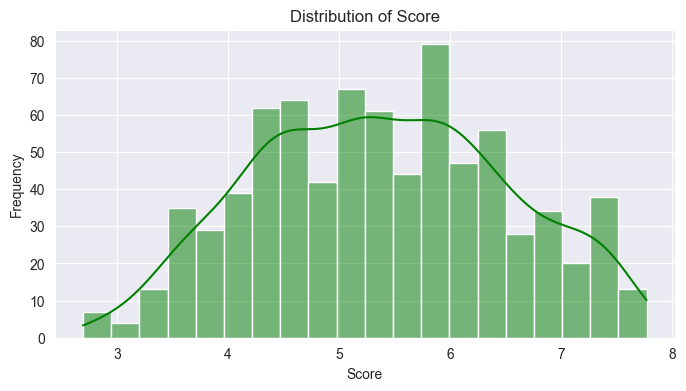

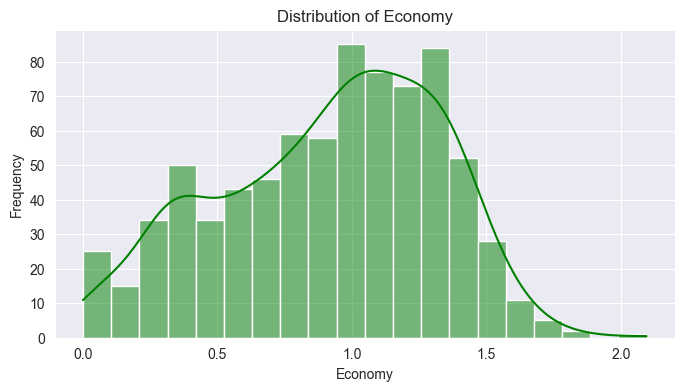

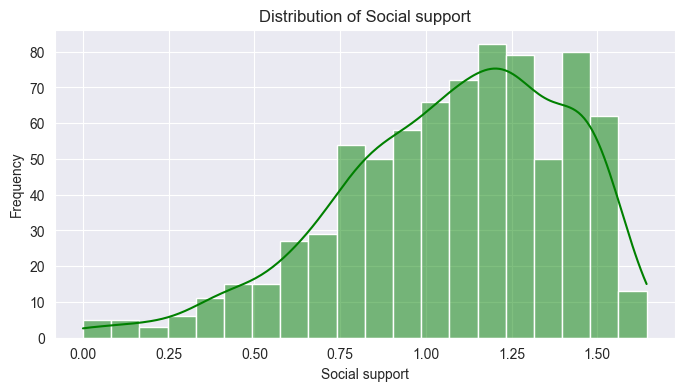

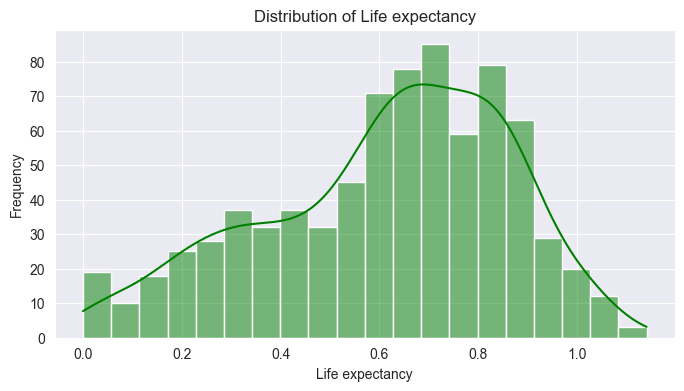

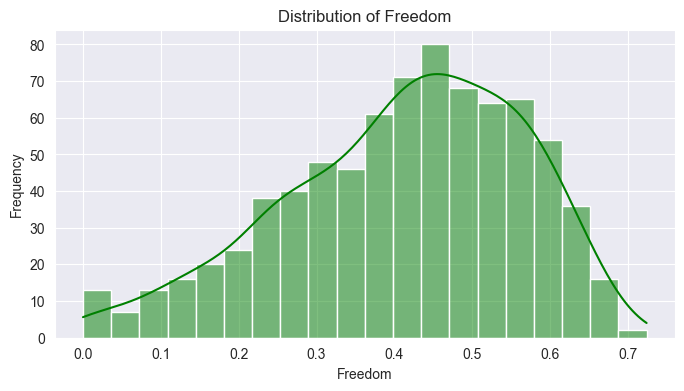

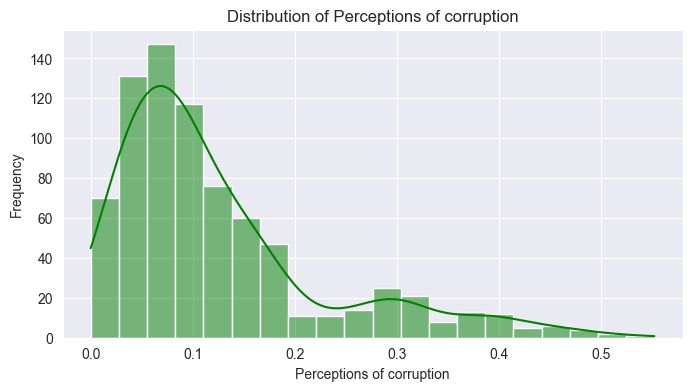

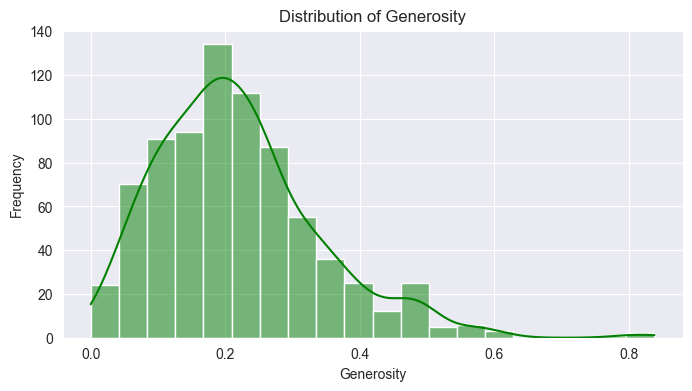

In [24]:
# Histogram for each numeric column
numeric_features = ['Score', 'Economy', 'Social support', 'Life expectancy', 'Freedom', 
                    'Perceptions of corruption', 'Generosity']
for feature in numeric_features:
    plt.figure(figsize=(8, 4))
    sns.histplot(df_combined[feature], kde=True, bins=20, color='green')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()


In [30]:
# Combine X_train and y_train for correlation analysis
train_data = X_train.copy()
train_data['Score'] = y_train  # Add the target column back for correlation

# Exclude non-numeric columns like 'Country'
numeric_train_data = train_data.select_dtypes(include=['float64', 'int64'])  # Select only numeric data

# Compute correlations

correlation = numeric_train_data.corr()
score_corr = correlation['Score'].sort_values(ascending=False)
print("Correlation of Features with Score:")
print(score_corr)


Correlation of Features with Score:
Score                        1.000000
Economy                      0.789818
Life expectancy              0.749292
Social support               0.644567
Freedom                      0.577345
Perceptions of corruption    0.440343
Generosity                   0.156041
Name: Score, dtype: float64


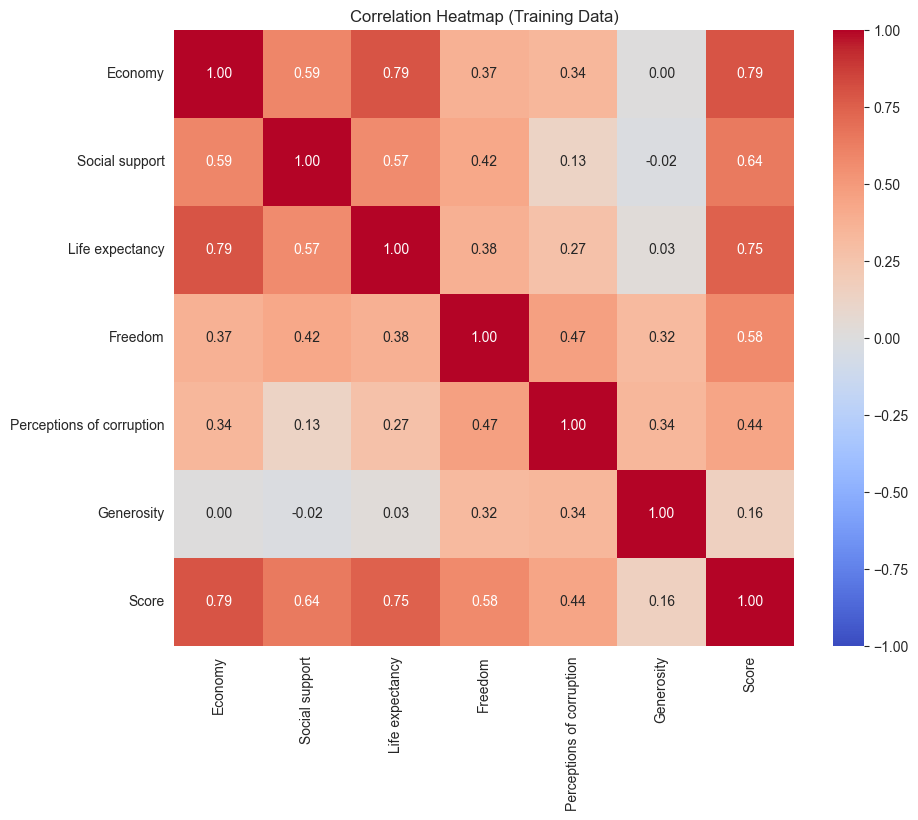

In [31]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Heatmap (Training Data)')
plt.show()